In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In sklearn.datasets there are 7 sample datasets (In 1.1.3 version)
    
    load_boston(*[, return_X_y])
    load_iris(*[, return_X_y, as_frame])
    load_diabetes(*[, return_X_y, as_frame, scaled])
    load_digits(*[, n_class, return_X_y, as_frame])
    load_linnerud(*[, return_X_y, as_frame])
    load_wine(*[, return_X_y, as_frame])
    load_breast_cancer(*[, return_X_y, as_frame])

Supervised Learning - Tree-based models

      Decision Tree

In [50]:
from sklearn.datasets import load_iris
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


# IRIS data
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [51]:
# function to visualize decision tree
def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf,
                    feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

#function to visualize decision regions
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    return Z



In [52]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)
pd.DataFrame(iris.data, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


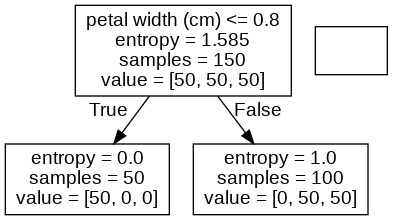

In [53]:
draw_decision_tree(tree1)

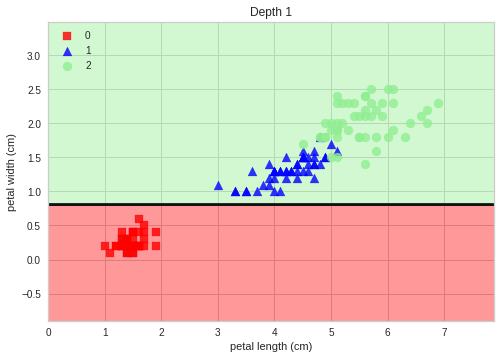

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [54]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()
confusion_matrix(y, tree1.predict(X))

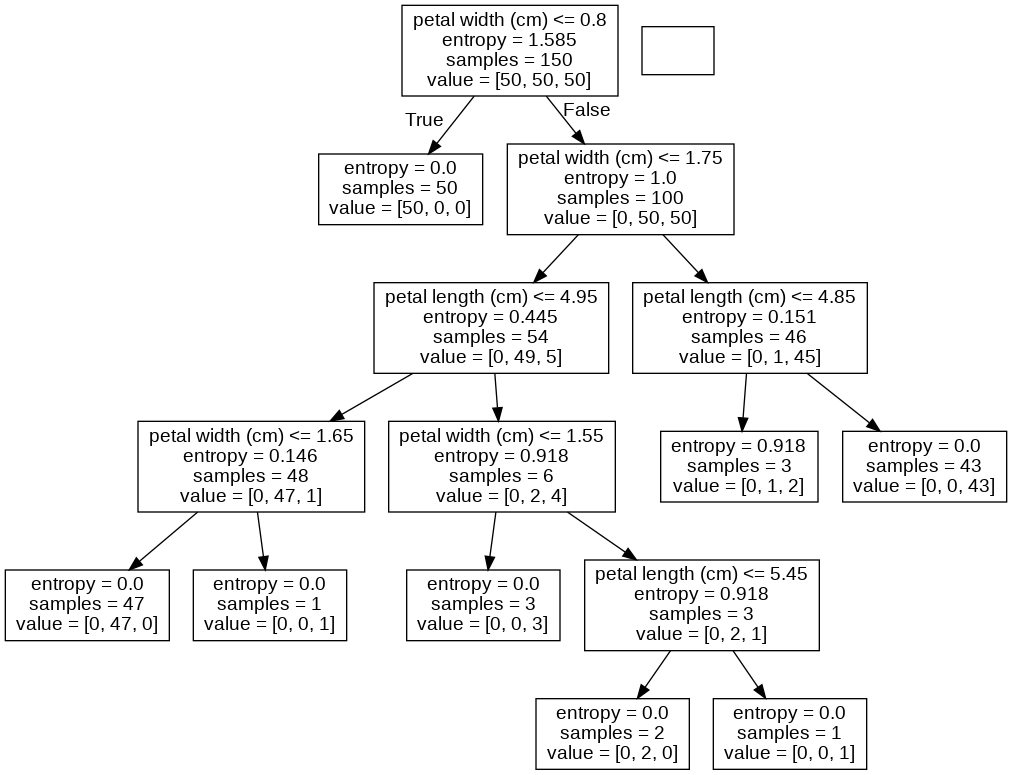

In [55]:
tree5 = DecisionTreeClassifier(
    criterion='entropy', max_depth=5, random_state=0).fit(X, y)
draw_decision_tree(tree5)

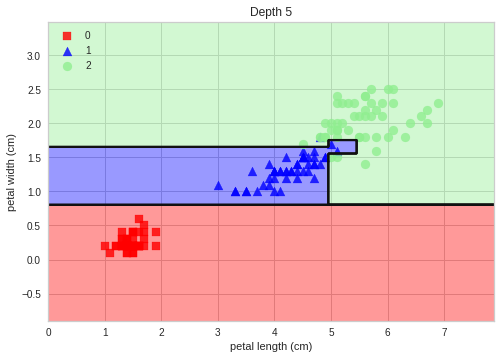

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

In [56]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()
confusion_matrix(y, tree5.predict(X))

Supervised Learning - Linear Model

    Logistic Regression

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 

# titanic data
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [58]:
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"])
dfX["age"].fillna(dfX["age"].mean(), inplace=True)
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]),
                    columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["pclass"])
dfX.tail()

X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfy, test_size=0.3,)
X_train.tail()

,age,sex,c1,c2,c3
826,29.699118,1,0,0,1
672,70.000000,1,0,1,0
885,39.000000,0,0,0,1
455,29.000000,1,0,0,1
454,29.699118,1,0,0,1


In [59]:
log_clf = LogisticRegression()
log_clf.fit(X_train,Y_train)
log_clf.score(X_test, Y_test)

0.7798507462686567

In [60]:
feature_names = ["pclass", "age", "sex","class"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"])
dfX["age"].fillna(dfX["age"].mean(), inplace=True)
dfX["class"] = dfX["class"].dropna()
dfX["class"] = LabelEncoder().fit_transform(dfX["class"])
dfX["pclass"] = LabelEncoder().fit_transform(dfX["pclass"])
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfy, test_size=0.3)
X_train.head()

,pclass,age,sex,class
455,2,29.000000,1,2
231,2,29.000000,1,2
156,2,16.000000,0,2
321,2,27.000000,1,2
214,2,29.699118,1,2


In [61]:
log_clf = LogisticRegression()
log_clf.fit(X_train,Y_train)
log_clf.score(X_test, Y_test)

0.7686567164179104

Train/Test split results:
LogisticRegression accuracy is 0.769
LogisticRegression log_loss is 7.990
LogisticRegression auc is 0.763


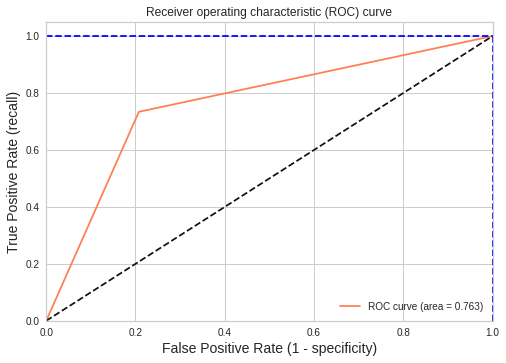

Using a threshold of 0.000 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.


In [62]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve,log_loss,auc
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 

y_pred = log_clf.predict(X_test)
[fpr, tpr, thr] = roc_curve(Y_test, y_pred)
print('Train/Test split results:')
print(log_clf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, y_pred))
print(log_clf.__class__.__name__+" log_loss is %2.3f" % log_loss(Y_test, y_pred))
print(log_clf.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Unsupervised Learning - Clustering

    K-Means

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [78]:
from google.colab import files
uploadFile = files.upload()

Saving CustomerDataSet.csv to CustomerDataSet.csv


In [79]:
data = pd.read_csv('CustomerDataSet.csv')
data.head()

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435


In [85]:
processed_data = data.copy()

# normalization
scaler = MinMaxScaler()
processed_data[['ItemsBought', 'ItemsReturned']] = scaler.fit_transform(processed_data[['ItemsBought', 'ItemsReturned']])

plt.figure(figsize = (20, 12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

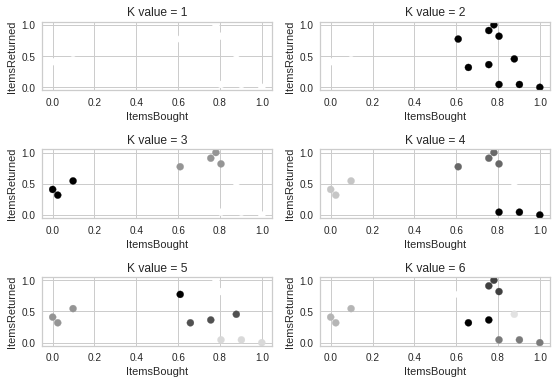

In [86]:
# change value of K
for i in range(1, 7):
  # create Cluster
  estimator = KMeans(n_clusters = i)
  ids = estimator.fit_predict(processed_data[['ItemsBought', 'ItemsReturned']])
  # 2*3 subplot (index = i)
  plt.subplot(3, 2, i)
  plt.tight_layout()
  # label subplot
  plt.title("K value = {}".format(i))
  plt.xlabel('ItemsBought')
  plt.ylabel('ItemsReturned')
  # draw clustering
  plt.scatter(processed_data['ItemsBought'], processed_data['ItemsReturned'], c=ids)  
plt.show()

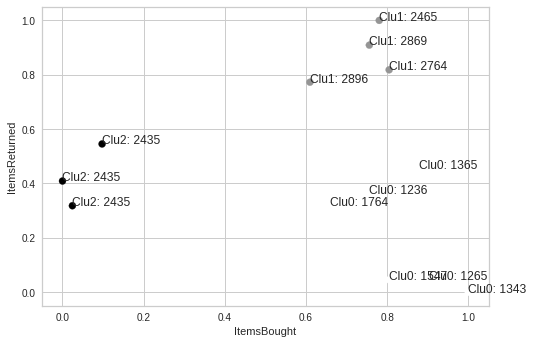

In [87]:
# K = 3 clustering
estimator = KMeans(n_clusters = 3)

# create clustering
cluster_ids = estimator.fit_predict(processed_data[['ItemsBought', 'ItemsReturned']])

# create a scatter plot
plt.scatter(processed_data['ItemsBought'], processed_data['ItemsReturned'], c=cluster_ids)

for index, c_id, bought, returned, zip_code, product in processed_data.itertuples():
    plt.annotate("Clu{}: {}".format(cluster_ids[index], product),(bought, returned))
    
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
plt.show()

In [88]:
# show cluster id is 1
data[ cluster_ids == 1 ]

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
1,5,42,18,5,2764
5,10,34,17,6,2896
6,11,40,20,8,2869
12,21,41,22,9,2465


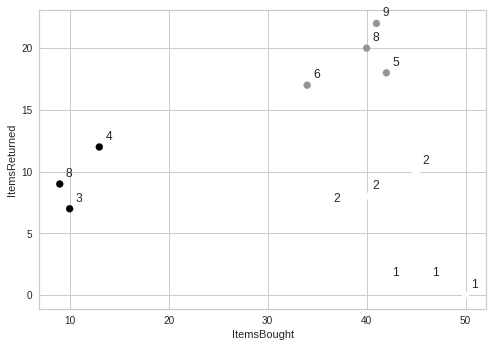

In [89]:
plt.scatter(data['ItemsBought'], data['ItemsReturned'], c=cluster_ids)

# label by zip code
for (index, c_id, bought, returned, zip_code, product) in data.itertuples():
    plt.annotate(zip_code,(bought + 0.6, returned + 0.6))
    
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')

plt.show()